In [1]:
devtools::load_all()

ℹ Loading ICESat2VegR
Creating a new generic function for 'clip' in package 'ICESat2VegR'

Creating a generic function from function 'map' in package 'ICESat2VegR'


##----------------------------------------------------------------##
ICESat2VegR package, version 0.0.1, Released 2024-03-06 UTC
This package is based upon work supported by the NASA ICESat-2 under grants No. ****. 
##----------------------------------------------------------------##



In [2]:
# Specifying bounding box coordinates
lower_left_lon <- -96.0
lower_left_lat <- 40.0
upper_right_lon <- -100
upper_right_lat <- 42.0


# Specifying the date range
daterange <- c("2019-07-11T20:17:00", "2019-07-11T20:18:00")

In [3]:
# Extracting the path to ICESat-2 ATLAS data for the specified boundary box coordinates
atl08_granules_list_d <- ICESat2_dataFinder(
  short_name = "ATL08",
  lower_left_lon,
  lower_left_lat,
  upper_right_lon,
  upper_right_lat,
  version = "006",
  daterange = daterange,
  cloud_hosted = TRUE,
  cloud_computing = FALSE
)

atl08_granules_list_c <- ICESat2_dataFinder(
  short_name = "ATL08",
  lower_left_lon,
  lower_left_lat,
  upper_right_lon,
  upper_right_lat,
  version = "006",
  daterange = daterange,
  cloud_hosted = FALSE,
  cloud_computing = TRUE
)


# Extracting the path to ICESat-2 ATLAS data for the specified boundary box coordinates
atl03_granules_list_d <- ICESat2_dataFinder(
  short_name = "ATL03",
  lower_left_lon,
  lower_left_lat,
  upper_right_lon,
  upper_right_lat,
  version = "006",
  daterange = daterange,
  persist = TRUE,
  cloud_hosted = TRUE,
  cloud_computing = FALSE
)

atl03_granules_list_c <- ICESat2_dataFinder(
  short_name = "ATL03",
  lower_left_lon,
  lower_left_lat,
  upper_right_lon,
  upper_right_lat,
  version = "006",
  daterange = daterange,
  persist = TRUE,
  cloud_hosted = FALSE,
  cloud_computing = TRUE
)


In [3]:
input_dir <- "Z:\\01_Projects\\04_NASA_ICESat2\\11_others\\rICESat2Veg\\inst\\exdata"
atl08_path <- file.path(input_dir, "ATL08_20220401221822_01501506_005_01.h5")
atl03_path <- file.path(input_dir, "ATL03_20220401221822_01501506_005_01.h5")


In [34]:
atl03_h5 <- ATL03_read(atl03_path = atl03_path)
atl08_h5 <- ATL08_read(atl08_path = atl08_path)


In [6]:
atl03_photons_dt <- ATL03_photons_attributes_dt(atl03_h5 = atl03_h5, beam = "gt1r")
head(atl03_photons_dt)


  |                                                                      |   0%

gt1r



  |======================================================================| 100%


lon_ph,lat_ph,h_ph,quality_ph,solar_elevation,dist_ph_along
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-103.7555,59.49127,422.8559,0,23.49145,0.5788960
-103.7555,59.49127,413.9451,0,23.49145,0.5501707
-103.7555,59.49127,301.0684,0,23.49145,0.1823875
-103.7555,59.49126,434.1847,0,23.49145,1.3294470
-103.7555,59.49126,398.2455,0,23.49145,1.2123015
-103.7555,59.49126,369.2183,0,23.49145,1.1181128


In [7]:
atl08_photons_dt <- ATL08_photons_attributes_dt(atl08_h5 = atl08_h5, beam = "gt1r")
head(atl08_photons_dt)


  |======================================================================| 100%


ph_segment_id,beam,classed_pc_indx,classed_pc_flag,ph_h,d_flag,delta_time
<int>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>
671089,gt1r,8,1,-0.1245117,1,134086702
671089,gt1r,9,1,-0.2919922,1,134086702
671089,gt1r,11,0,-1.0151367,1,134086702
671089,gt1r,15,0,-0.8881836,1,134086702
671089,gt1r,23,0,-0.9491882,1,134086702
671089,gt1r,33,0,-0.6138306,1,134086702


In [8]:
atl08_seg_att_dt <- ATL08_seg_attributes_dt(atl08_h5 = atl08_h5)
head(atl08_seg_att_dt)
class(atl08_seg_att_dt)


  |======================================================================| 100%


latitude,longitude,beam,h_canopy,canopy_openness,h_te_mean,terrain_slope
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
59.49081,-103.7556,gt1r,4.820282,1.0603539,343.2197,0.06025224
59.48993,-103.7558,gt1r,2.681976,0.7612819,345.8327,-0.01439811
59.48903,-103.7560,gt1r,3.851379,0.9414949,346.6401,0.04266450
59.48814,-103.7561,gt1r,4.076965,0.9898106,350.9311,0.04225401
59.48725,-103.7563,gt1r,6.157623,1.1411711,350.4123,-0.11771229
59.48635,-103.7565,gt1r,6.686523,1.4989151,340.1538,-0.05887743


[1] "icesat2.atl08_dt" "data.table"       "data.frame"

In [9]:
summary(atl08_seg_att_dt)


    latitude       longitude          beam              h_canopy        
 Min.   :26.99   Min.   :-108.3   Length:128374      Min.   :1.000e+00  
 1st Qu.:32.74   1st Qu.:-107.7   Class :character   1st Qu.:7.000e+00  
 Median :37.66   Median :-107.1   Mode  :character   Median :1.200e+01  
 Mean   :38.51   Mean   :-106.9                      Mean   :7.177e+37  
 3rd Qu.:43.09   3rd Qu.:-106.4                      3rd Qu.:2.800e+01  
 Max.   :59.50   Max.   :-103.8                      Max.   :3.403e+38  
 canopy_openness       h_te_mean         terrain_slope       
 Min.   :0.000e+00   Min.   :3.160e+02   Min.   :-4.000e+00  
 1st Qu.:2.000e+00   1st Qu.:1.329e+03   1st Qu.: 0.000e+00  
 Median :3.000e+00   Median :2.026e+03   Median : 0.000e+00  
 Mean   :7.177e+37   Mean   :4.836e+37   Mean   : 2.651e+33  
 3rd Qu.:7.000e+00   3rd Qu.:2.667e+03   3rd Qu.: 0.000e+00  
 Max.   :3.403e+38   Max.   :3.403e+38   Max.   : 3.403e+38  

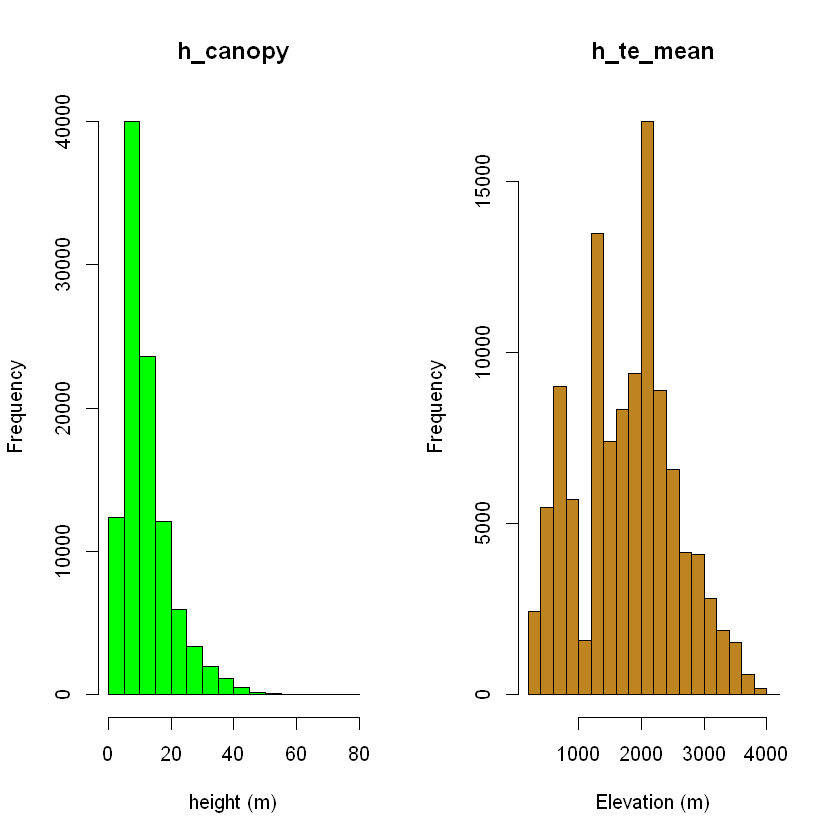

In [10]:
# plotting histograms
atl08_seg_att_dt$h_canopy[atl08_seg_att_dt$h_canopy > 80] <- NA # set NA to values > 80 m
atl08_seg_att_dt$h_te_mean[atl08_seg_att_dt$h_te_mean > 5000] <- NA # set NA to values > 5000 m
par(mfrow = c(1, 2))
hist(atl08_seg_att_dt$h_canopy, col = "green", xlab = "height (m)", main = "h_canopy")
hist(atl08_seg_att_dt$h_te_mean, col = "#bd8421", xlab = "Elevation (m)", main = "h_te_mean")


In [11]:
# Clipping by geometry

# Specify the path to shapefile
#poly_filepath <- system.file("extdata", "polygon.shp", package = "ICESat2VegR")
poly_filepath <- "Z:\\01_Projects\\04_NASA_ICESat2\\00_data\\01_SHPs\\sample_polygon.shp"

# Read shapefile
library(terra)
sppoly <- terra::vect(poly_filepath)

class(atl08_seg_att_dt)


terra 1.7.55


Attaching package: 'terra'


The following objects are masked from 'package:ICESat2VegR':

    extract, inset, interpolate, shift, values


The following objects are masked from 'package:testthat':

    compare, describe




[1] "icesat2.atl08_dt" "data.table"       "data.frame"

In [12]:
# Clip
atl08_seg_att_dt_clipg <- ATL08_seg_attributes_dt_clipGeometry(atl08_seg_att_dt, sppoly, split_by = "FID")
head(atl08_seg_att_dt_clipg) # print the first six observations

[1] "The polygon does not overlap the ATL08 data"


[1] "The polygon does not overlap the ATL08 data"

In [13]:
library(leaflet)

In [14]:
idx <- sample(seq_len(nrow(atl08_seg_att_dt)), 1000)
m1 <- leaflet() %>%
  setView(lng = mean(atl08_seg_att_dt[idx]$longitude), lat = mean(atl08_seg_att_dt[idx]$latitude), zoom = 3) %>%
  addCircleMarkers(atl08_seg_att_dt[idx]$longitude,
    atl08_seg_att_dt[idx]$latitude,
    radius = 1,
    opacity = 1,
    color = "red"
  ) %>%
  addScaleBar(options = list(imperial = FALSE)) %>%
  addProviderTiles(providers$Esri.WorldImagery) %>%
  addLegend(colors = c("red", "green"), labels = c("All samples", "Clip bbox"), title = "ATL08")

m1

HTML widgets cannot be represented in plain text (need html)

class       : SpatRaster 
dimensions  : 650, 92, 1  (nrow, ncol, nlyr)
resolution  : 0.05, 0.05  (x, y)
extent      : -108.3416, -103.7416, 26.98741, 59.48741  (xmin, xmax, ymin, ymax)
coord. ref. : lon/lat WGS 84 (EPSG:4326) 
source(s)   : memory
name        : h_canopy_V1 
min value   :    3.048096 
max value   :   77.398438 

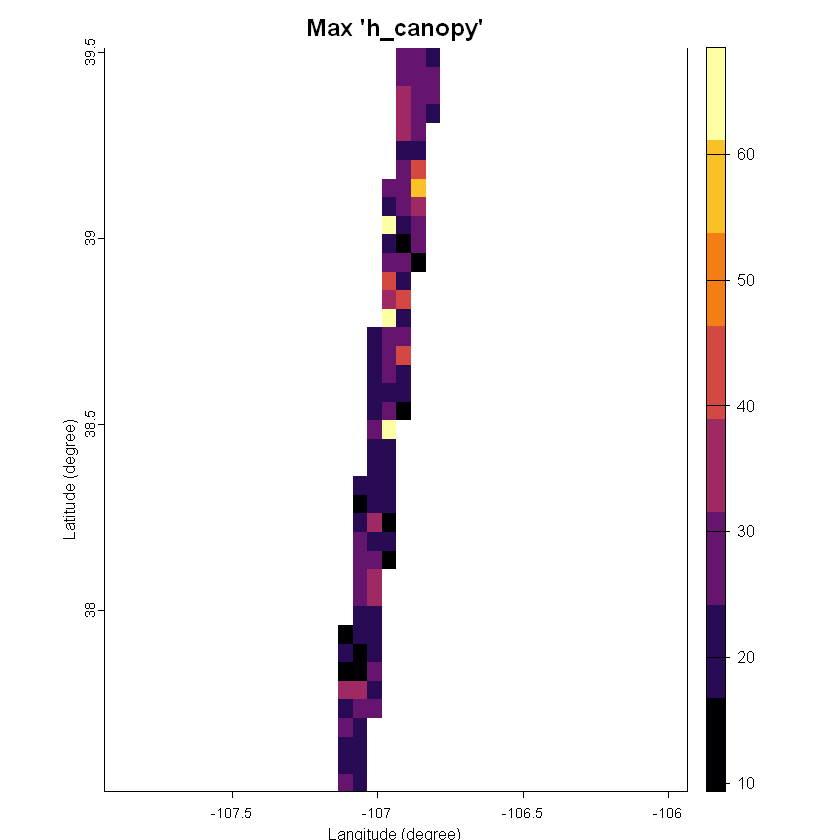

In [15]:
## Computing the top h_canopy at 30 m grid cell
max_h_canopy <- ATL08_seg_attributes_dt_gridStat(atl08_seg_att_dt, func = max(h_canopy), res = 0.05)
na.omit(max_h_canopy)
plot(max_h_canopy,
  xlim = mean(atl08_seg_att_dt$longitude) + c(-1, 1), ylim = mean(atl08_seg_att_dt$latitude) + c(-1, 1), col = viridis::inferno(8),
  main = "Max 'h_canopy'",
  xlab = "Langitude (degree)",
  ylab = "Latitude (degree)"
)


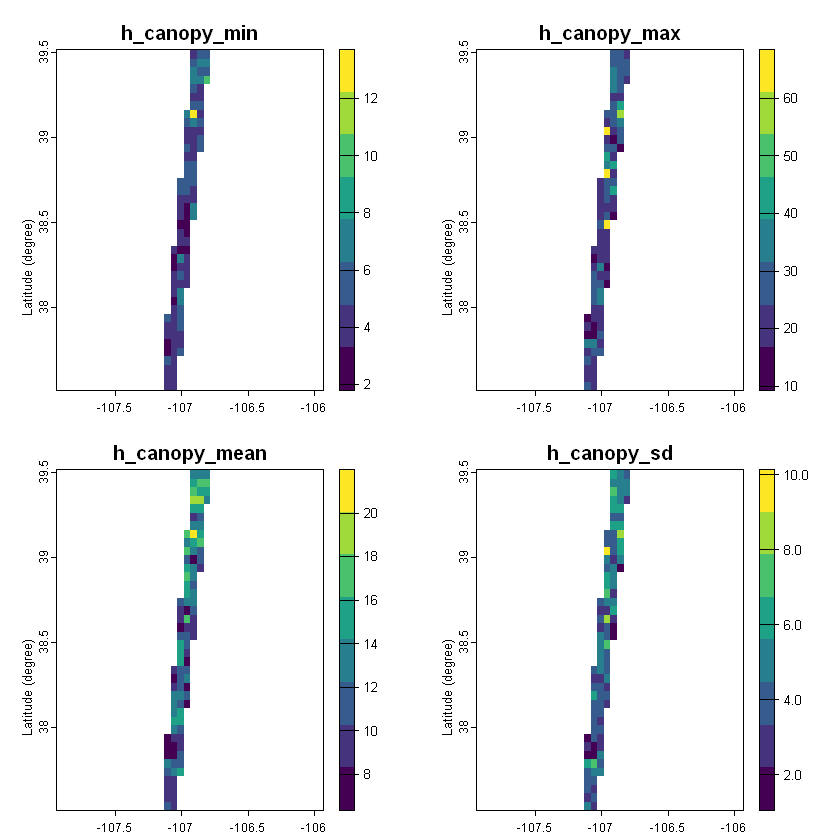

In [16]:
# Define your own function
mySetOfMetrics <- function(x) {
  metrics <- list(
    min = min(x), # Min of x
    max = max(x), # Max of x
    mean = mean(x), # Mean of x
    sd = sd(x) # Sd of x
  )
  return(metrics)
}

# Computing a series of h_canopy statistics at 30 m grid cellfrom customized function
atl08_seg_att_dt$h_canopy[atl08_seg_att_dt$h_canopy > 80] <- NA # set values > 80 m to NA m
h_canopy_metrics <- ATL08_seg_attributes_dt_gridStat(atl08_seg_att_dt, func = mySetOfMetrics(h_canopy), res = 0.05)
plot(h_canopy_metrics,
  xlim = mean(atl08_seg_att_dt$longitude) + c(-1, 1), 
  ylim = mean(atl08_seg_att_dt$latitude) + c(-1, 1),
  col = viridis::viridis(8),
  xlab = "Langitude (degree)",
  ylab = "Latitude (degree)"
)


In [17]:
i = "gt1r"
atl03_beam_group <- atl03_h5[[i]]
atl08_beam_group <- atl08_h5[[i]]


In [18]:
atl03_beam_group

<ICESat2.h5_local>
  Public:
    attr: function (attribute) 
    beams: NULL
    clone: function (deep = FALSE) 
    close_all: function () 
    dt_datasets: function (recursive = FALSE) 
    exists: function (path) 
    h5: H5Group, H5RefClass, R6
    inherit: ICESat2.h5
    initialize: function (h5) 
    isOpen: TRUE
    ls: function () 
    ls_attrs: function () 
    ls_groups: function (recursive = FALSE) 

In [51]:
segment_ph_cnt <- atl03_beam_group[["geolocation/segment_ph_cnt"]][]

dataTableATL03Segs <- data.table::data.table(data.frame(
  ph_segment_id = atl03_beam_group[["geolocation/segment_id"]][],
  ph_index_beg = atl03_beam_group[["geolocation/ph_index_beg"]][],
  segment_ph_cnt = segment_ph_cnt
))

dataTableATL08Photons <- data.table::data.table(
      ph_segment_id = atl08_beam_group[["signal_photons/ph_segment_id"]][],
      classed_pc_indx = atl08_beam_group[["signal_photons/classed_pc_indx"]][],
      classed_pc_flag = atl08_beam_group[["signal_photons/classed_pc_flag"]][],
      ph_h = atl08_beam_group[["signal_photons/ph_h"]][],
      d_flag = atl08_beam_group[["signal_photons/d_flag"]][],
      delta_time = atl08_beam_group[["signal_photons/delta_time"]][]
    )

In [20]:
segments_exists <- unique(dataTableATL08Photons$ph_segment_id)

In [21]:
dataTableATL03Segs <- dataTableATL03Segs[ph_segment_id %in% segments_exists]

In [22]:
Rcpp::cppFunction("
IntegerVector vectorized_seq_len(IntegerVector begin, IntegerVector output_length) {
    int totalSize = sum(output_length);
    IntegerVector output(totalSize);
    int current_index = 0;
    for (int ii = 0; ii < begin.length(); ii++) {
        for (int jj: seq(begin[ii], begin[ii] + output_length[ii] - 1)) {
            output[current_index++] = jj;
        }
    }
    return output;
}
")

In [35]:
head(dataTableATL08Photons)

ph_segment_id,classed_pc_indx,classed_pc_flag,ph_h,d_flag,delta_time
<int>,<int>,<int>,<dbl>,<int>,<dbl>
671089,8,1,-0.1245117,1,134086702
671089,9,1,-0.2919922,1,134086702
671089,11,0,-1.0151367,1,134086702
671089,15,0,-0.8881836,1,134086702
671089,23,0,-0.9491882,1,134086702
671089,33,0,-0.6138306,1,134086702


In [54]:
data.table::setindex(dataTableATL08Photons, ph_segment_id)
data.table::setindex(dataTableATL03Segs, ph_segment_id)

In [55]:
dataTableATL08Photons[dataTableATL03Segs, classed_pc_indx := classed_pc_indx + ph_index_beg - 1, on = "ph_segment_id"]

In [56]:
dataTableATL08Photons

ph_segment_id,classed_pc_indx,classed_pc_flag,ph_h,d_flag,delta_time
<int>,<int>,<int>,<dbl>,<int>,<dbl>
671089,8,1,-0.124511719,1,134086702
671089,9,1,-0.291992188,1,134086702
671089,11,0,-1.015136719,1,134086702
671089,15,0,-0.888183594,1,134086702
671089,23,0,-0.949188232,1,134086702
671089,33,0,-0.613830566,1,134086702
671089,45,1,-0.285491943,1,134086702
671089,58,1,0.370269775,1,134086702
671089,88,1,-0.020721436,1,134086702


In [209]:
## Merging ATL03 and ATL08 photon attributes
atl03_atl08_dt <- ATL03_ATL08_photons_attributes_dt_join(atl03_h5, atl08_h5, beam = "gt1r")
head(atl03_atl08_dt)

  |======================================================================| 100%


lon_ph,lat_ph,h_ph,quality_ph,solar_elevation,dist_ph_along,dist_ph_across,night_flag,ph_segment_id,classed_pc_indx,classed_pc_flag,ph_h,d_flag,delta_time,beam
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>
-103.7555,59.49127,422.8559,0,23.49145,0.5788960,9642.193,0,671089,1,NA,NA,NA,NA,gt1r
-103.7555,59.49127,413.9451,0,23.49145,0.5501707,9642.380,0,671089,2,NA,NA,NA,NA,gt1r
-103.7555,59.49127,301.0684,0,23.49145,0.1823875,9644.737,0,671089,3,NA,NA,NA,NA,gt1r
-103.7555,59.49126,434.1847,0,23.49145,1.3294470,9641.955,0,671089,4,NA,NA,NA,NA,gt1r
-103.7555,59.49126,398.2455,0,23.49145,1.2123015,9642.706,0,671089,5,NA,NA,NA,NA,gt1r
-103.7555,59.49126,369.2183,0,23.49145,1.1181128,9643.312,0,671089,6,NA,NA,NA,NA,gt1r


In [210]:
atl03_atl08_dt_filter <- na.omit(atl03_atl08_dt)[ph_h > 0 & ph_h < 60]


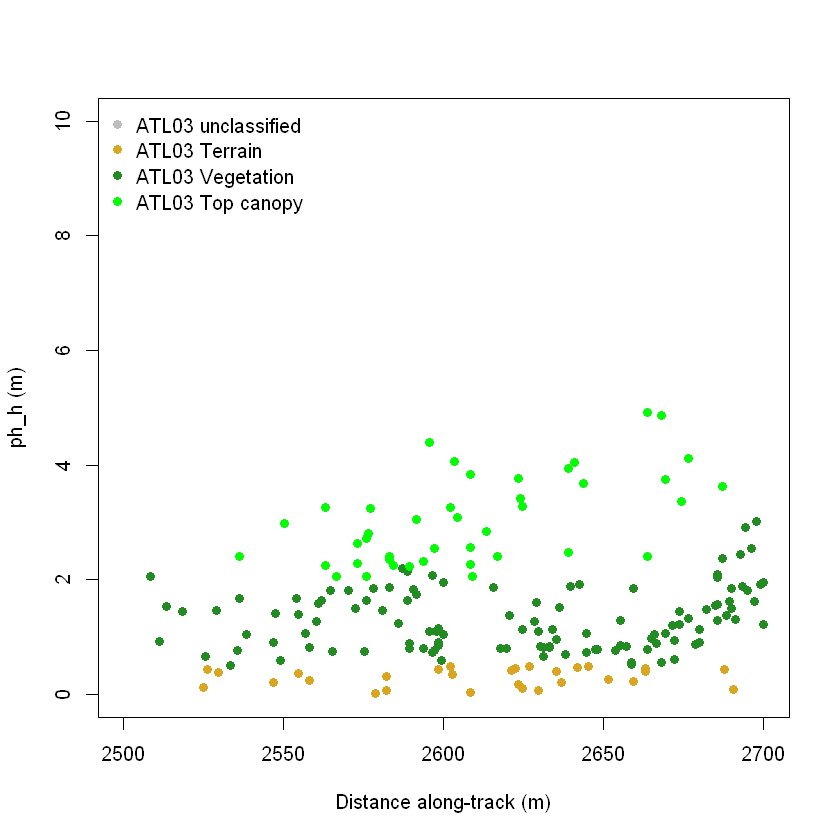

In [223]:
start <- 2500
plot(atl03_atl08_dt_filter,
  y = "ph_h",
  ylim = c(0, 10), 
     xlim = c(start, start + 1500), 
     pch = 16,
)


In [224]:
saveRDS(atl03_atl08_dt_filter[dist_ph_along > start & dist_ph_along < (start + 200) & beam == "gt1r"], "test.rds")

In [225]:
dt <- readRDS("test.rds")

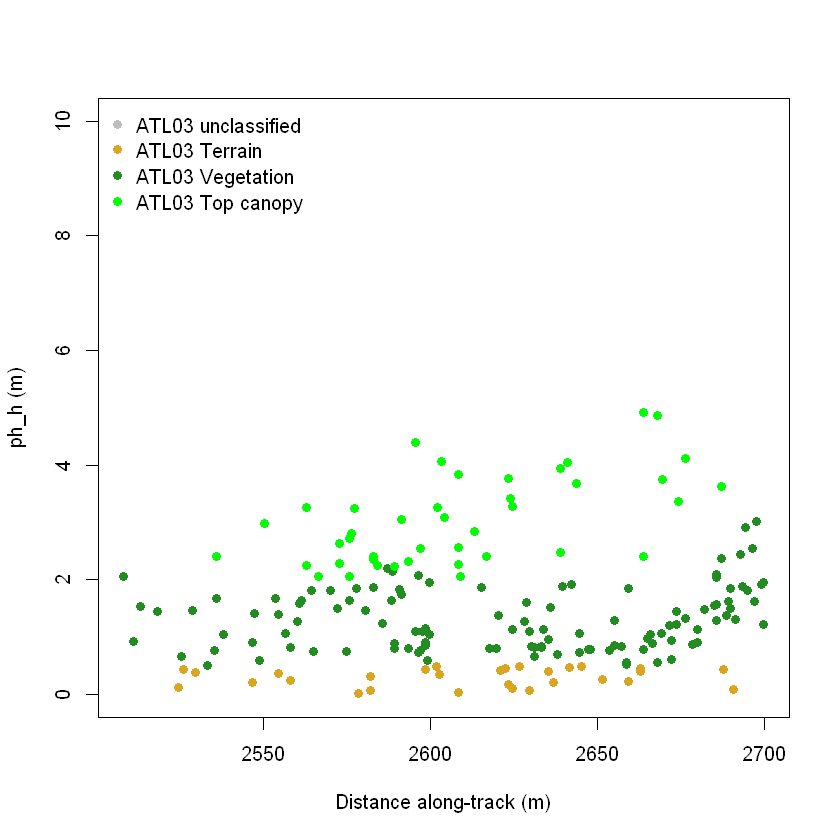

In [226]:
plot(dt, y = "ph_h", beam = "gt1r",
  ylim = c(0, 10), pch = 16
     )

In [227]:
vect = terra::vect
setMethod(
    "vect", 
    "icesat2.atl03atl08_dt", 
    function(x, ...) {
        terra::vect(as.data.frame(x), ...)
    }
)


In [228]:
v <- vect(dt, geom = c("lon_ph", "lat_ph"), crs = "epsg:4326")
v2 <- terra::convHull(v)
terra::writeVector(v, "output.gpkg", overwrite=TRUE)
terra::writeVector(v2, "output2.gpkg", overwrite=TRUE)

In [229]:
unique(dt$ph_segment_id)

[1] 671214 671215 671216 671217 671218 671219 671220 671221 671222 671223

In [230]:
dataset = "geolocation/segment_length"
robj <- beam[[dataset]][FALSE]

In [90]:
close(atl03_h5_clip)
close(atl08_h5_clip)
atl03_h5_clip$h5$close_all()
atl08_h5_clip$h5$close_all()

gc()
file.remove("atl03_clip.h5")
file.remove("atl08_clip.h5")

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,3618077,193.3,6156282,328.8,6156282,328.8
Vcells,25579391,195.2,44947274,343.0,28903969,220.6


[1] TRUE

[1] TRUE

In [99]:
devtools::load_all()

ℹ Loading ICESat2VegR
Creating a new generic function for 'clip' in package 'ICESat2VegR'

Creating a generic function from function 'map' in package 'ICESat2VegR'


##----------------------------------------------------------------##
ICESat2VegR package, version 0.0.1, Released 2024-03-06 UTC
This package is based upon work supported by the NASA ICESat-2 under grants No. ****. 
##----------------------------------------------------------------##



In [93]:
atl08_h5_clip <- clip(atl08_h5, v2, output = "atl08_clip.h5")
atl03_h5_clip <- clip(atl03_h5, v2, output = "atl03_clip.h5")

Clipping gt1r (1/6)



  |======================================================================| 100%


Clipping gt2r (2/6)

Clipping gt1l (3/6)

Clipping gt3l (4/6)

Clipping gt2l (5/6)

Clipping gt3r (6/6)

Clipping gt1r (1/6)



  |======================================================================| 100%


Clipping gt2r (2/6)



  |======================================================================| 100%


Clipping gt1l (3/6)



  |======================================================================| 100%


Clipping gt3l (4/6)



  |======================================================================| 100%


Clipping gt2l (5/6)



  |======================================================================| 100%


Clipping gt3r (6/6)



  |======================================================================| 100%


In [430]:
atl03_atl08_dt_clip <- ATL03_ATL08_photons_attributes_dt_join(atl03_h5_clip, atl08_h5_clip)

  |==================                                                    |  25%   ph_segment_id    lon_ph   lat_ph     h_ph quality_ph solar_elevation
           <int>     <num>    <num>    <num>      <int>           <num>
1:        671215 -103.7601 59.46874 325.9640          0        23.50526
2:        671215 -103.7601 59.46874 278.7379          0        23.50526
3:        671215 -103.7601 59.46873 429.6898          0        23.50526
4:        671215 -103.7601 59.46872 416.0034          0        23.50526
5:        671215 -103.7601 59.46872 405.5378          0        23.50526
6:        671215 -103.7601 59.46872 382.8574          0        23.50526
   dist_ph_along dist_ph_across
           <num>          <num>
1:     0.3446315       9648.384
2:     0.1905272       9649.371
3:     1.3921306       9646.220
4:     2.0568457       9646.509
5:     2.0235429       9646.728
6:     1.9488899       9647.201
  |======================================================================| 100%


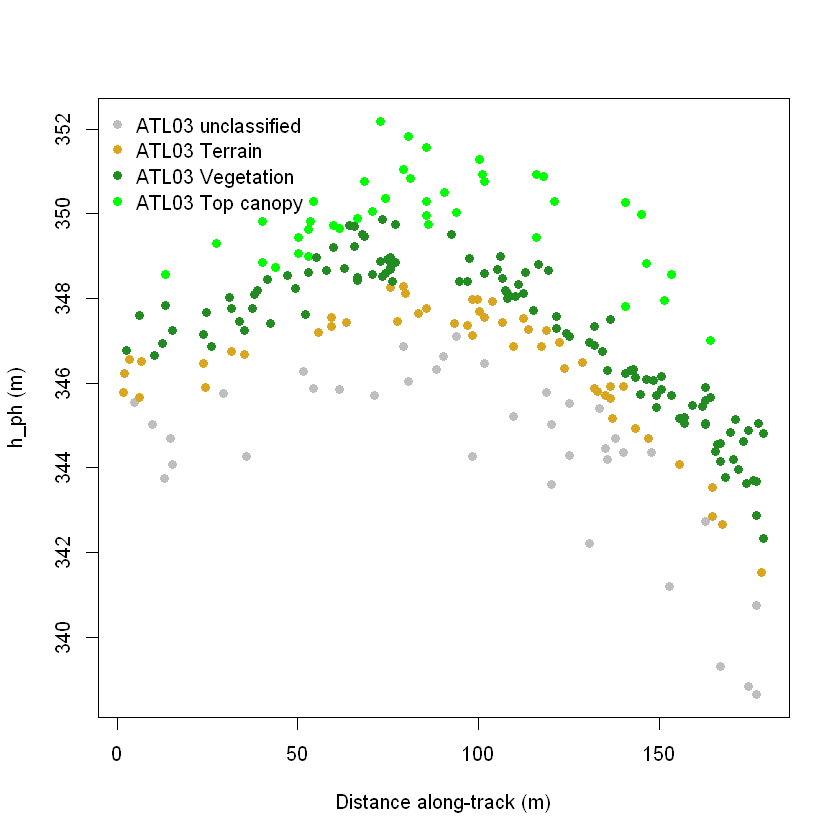

In [433]:
plot(atl03_atl08_dt_clip, y = "h_ph", colors=c("gray", "goldenrod", "forestgreen", "green"), pch = 16)